# Radiation Mode normalization classes

Trying to move away from having radiation mode normalization happen in only one of two ways inside coefficient method to supplying a user defined class.  Then having a few built in classes they can use.  Here we debug this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plot_complex
from scipy.optimize import newton
# from IPython.display import HTML

%matplotlib widget
plt.style.use('dark_background')

In [2]:
A = SlabExact(scale=1e-6, Ts=[5, 1, 4, 1, 5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[500, 300, 300, 300, 500],
              symmetric=True, wl=1e-6)

In [3]:
F = A.fields_Z(1, mode_type='radiation', radiation_normalization_method='ours')

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

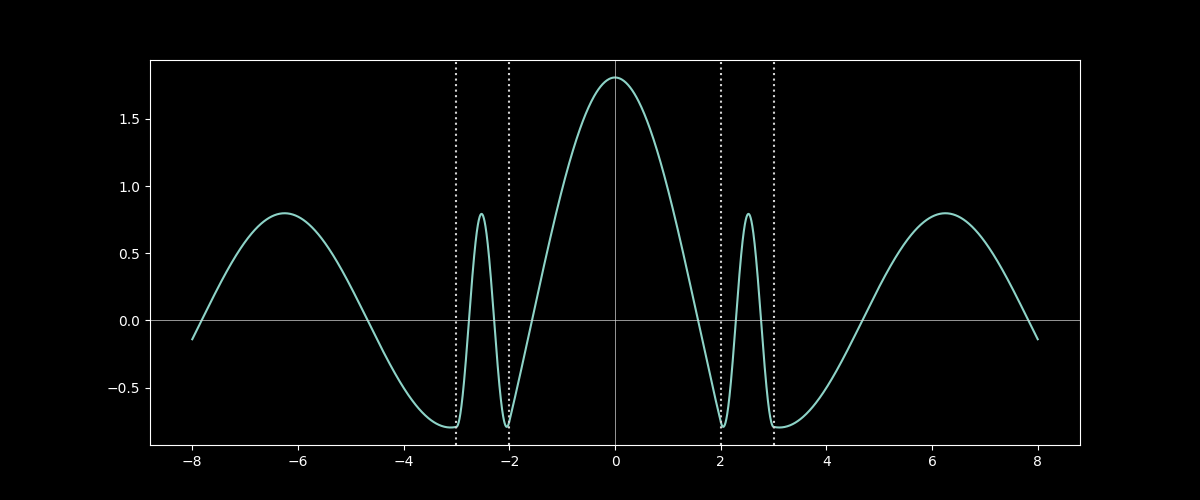

In [4]:
A.plot_field_1d(F)

(<Figure size 1100x500 with 2 Axes>, <Axes: >)

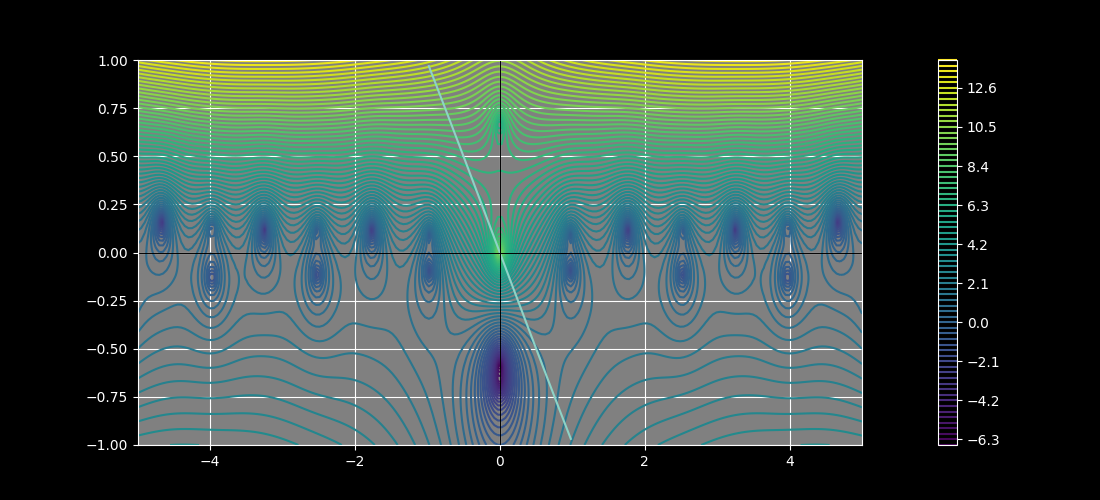

In [5]:
A.determinant_plot(-5, 5, -1, 1, mode_type='radiation', radiation_normalization_method='ours', sign=1)

In [6]:
N = A.radiation_normalization_class('ours')()

In [9]:
Z = newton(N.pole_locations, np.array(1-.18j))
A.plot_points(Z)

In [10]:
F2 = A.fields_Z(Z, mode_type='radiation', radiation_normalization_method='ours')

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

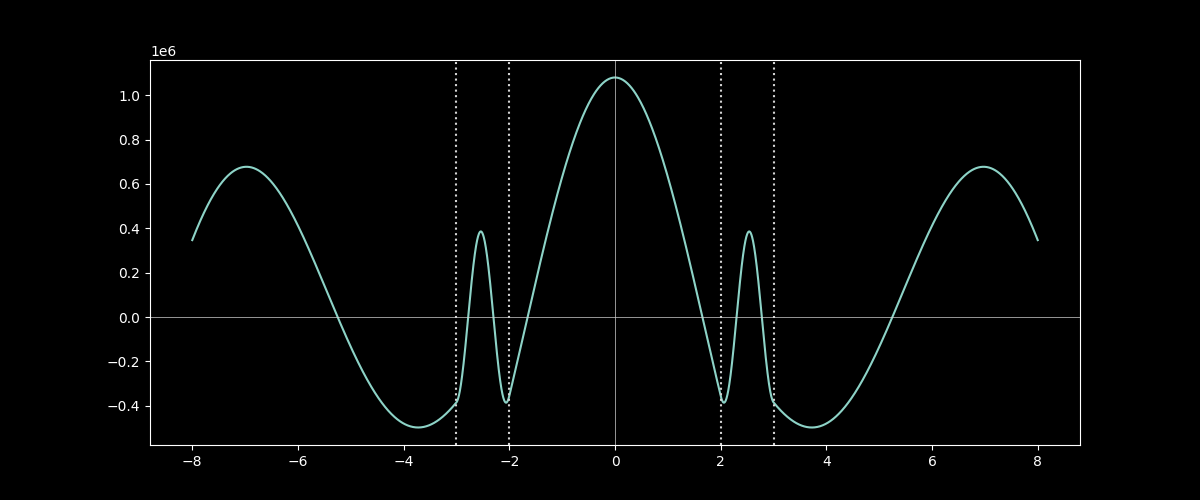

In [11]:
A.plot_field_1d(F2)